<a href="https://colab.research.google.com/github/JoehIreri/ROAD-ACCIDENT-SEVERITY-MODEL/blob/main/LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LINEAR REGRESSION**


HAVING A GLANCE AT THE DEPENDENT AND INDEPENDENT VARIABLES

In [17]:
import pandas as pd
Joeh = pd.read_csv('/content/Road accident severity_data1.csv')
data=Joeh.loc[:,['Road_surface_conditions','Accident_severity']]
data.head(1000)

,Road_surface_conditions,Accident_severity
0,9,1.0
1,9,2.0
2,9,2.0
3,9,1.2
4,9,1.0
...,...,...
995,9,1.0
996,9,1.0
997,9,2.0
998,9,1.0


VISUALIZING THE CHANGE IN THE VARIABLES

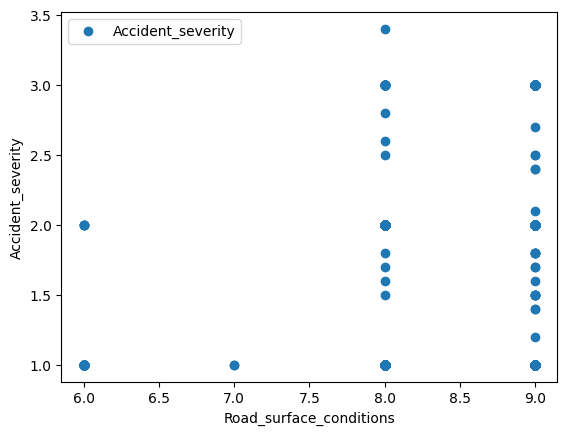

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
Joeh = pd.read_csv('/content/Road accident severity_data1.csv')
Joeh.plot(x='Road_surface_conditions',y='Accident_severity',style='o')
plt.xlabel('Road_surface_conditions')
plt.ylabel('Accident_severity')
data.head(1000)
plt.show()


ADDING A REGRESSION LINE

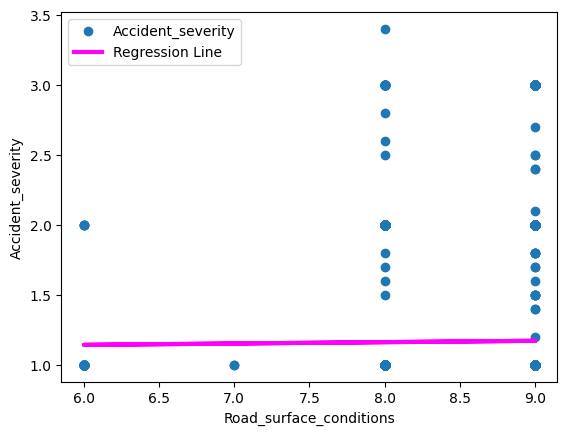

In [19]:
from sklearn.linear_model import LinearRegression
#Load the data
Joeh = pd.read_csv('/content/Road accident severity_data1.csv')
#Extract the independent variable (x) and dependent variable(y)
X = Joeh[['Road_surface_conditions']]
y = Joeh['Accident_severity']
#Create and fit a linear regression model
regressor = LinearRegression()
regressor.fit(X, y)
#Plot the data points
Joeh.plot(x='Road_surface_conditions', y='Accident_severity', style='o', label='Accident_severity')
#Overlay the regression line
plt.plot(X, regressor.predict(X), color='magenta', linewidth=3,label='Regression Line')
plt.xlabel('Road_surface_conditions')
plt.ylabel('Accident_severity')
plt.legend()
data.head(1000)
plt.show()

DIVIDING DATA INTO INDEPENDENT AND DEPENDENT VARIABLES

In [22]:
#Load the data
Joeh = pd.read_csv('/content/Road accident severity_data1.csv')
#Extract the independent variable (x) and dependent variable(y)
X = Joeh[['Road_surface_conditions']]
y = Joeh['Accident_severity']


SPLIT THE DATA INTO TRAIN AND TEST SETS

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
Joeh = pd.read_csv('/content/Road accident severity_data1.csv')
x=pd.DataFrame(data['Road_surface_conditions'])
y=pd.DataFrame(data['Accident_severity'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


SHAPE OF THE TRAIN AND TEST SETS

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9852, 1)
(2464, 1)
(9852, 1)
(2464, 1)


TRAINING THE ALGORITHM

In [25]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

RETRIEVING THE INTERCEPT

In [26]:
print(regressor.intercept_)

[1.09896246]


RETRIEVING THE SLOPE

In [27]:
print(regressor.coef_)

[[0.00809983]]


PREDICTED VALUES

In [28]:
y_pred = regressor.predict(X_test)
y_pred

array([[1.17186096],
       [1.17186096],
       [1.17186096],
       ...,
       [1.16376113],
       [1.17186096],
       [1.16376113]])

ACTUAL VALUES

In [29]:
#y_test
#print(y_test)
y_test.head(1000)

,Accident_severity
10974,1.0
5748,1.0
4941,1.0
11832,1.0
8173,1.0
...,...
1941,1.0
2598,1.0
7805,2.0
3880,1.0


EVALUATING THE ALGORITHM

In [30]:
from sklearn import metrics
import numpy as np
#Assuming y_test and y_pred are Numpy arrays or Pandas Series
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) #square root of MSE
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.2825306325852429
Mean Squared Error (MSE): 0.16121982352184447
Root Mean Squared Error (RMSE): 0.40152188423776414


SAVING THE LINEAR REGRESSION CREATED

In [31]:
import joblib
import pickle #pickle module
from sklearn.linear_model import LinearRegression
#Training The linear regression model
model = LinearRegression()
model.fit(x, y)
#Save the trained model to a file using joblib
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

USING THE TRAINED MODEL TO TEST MORE DATA SET

In [34]:
import joblib
import numpy as np
import pandas as pd
# Sample X values for prediction
new_X = np.array([8,9,10,11,12]).reshape(-1, 1) # Reshape to a 2D array
#Loading the trained model
model = joblib.load('linear_regression_model.pkl')#Loading the trained model
#Make predictions on the new X values
predictions = model.predict(new_X)
#Creating a Dataframe with one-dimensional arrays
new_data = pd.DataFrame({'x': new_X.flatten(), 'Predicted_y': predictions.flatten()})
#Display the new_data DataFrame with the X values and the predicted y values
print(new_data)

    x  Predicted_y
0   8     1.161645
1   9     1.171340
2  10     1.181035
3  11     1.190730
4  12     1.200425


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
